In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

file_path = r'D:\satyam porwal\power bi data\Diwali Sales Data.csv'
df = pd.read_csv(file_path, encoding='latin1')
df.head()



,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [5]:
df.drop(['Status','unnamed1'],axis=1,inplace = True)


In [6]:
df.head()



,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [7]:
df = df.dropna()

In [ ]:
And after dropping Columns we are dropping 12 empty field from Amount Column.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [9]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df['Amount'] = df['Amount'].astype(int)

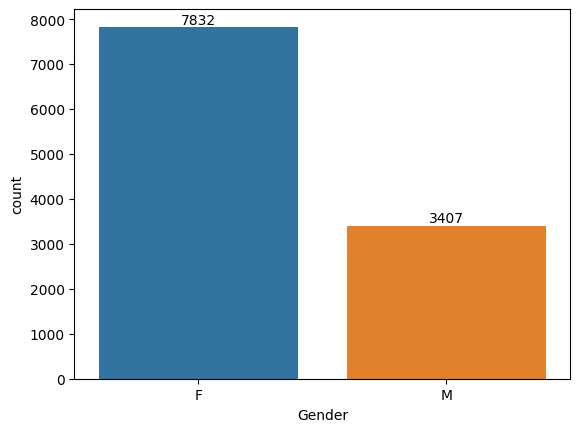

In [24]:
ax =  sns.countplot(x = 'Gender',data = df)
for x in ax.containers:
    ax.bar_label(x)

In [ ]:
Through above countplot we can easily gets a conclusion that the fmale buyers are more than male buyers.

In [25]:
sales_gender =  df.groupby(['Gender'],as_index= False)['Amount'].sum().sort_values(by='Amount',ascending =True)
sales_gender

,Gender,Amount
1,M,31913276
0,F,74335853


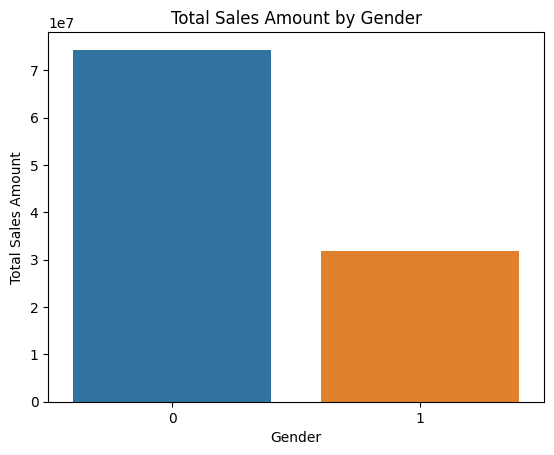

In [29]:
import seaborn as sns

# Assuming you already have sales_gender DataFrame with 'Gender' as index and 'Amount' as column
sns.barplot(x=sales_gender.index, y=sales_gender['Amount'])
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Gender')
plt.show()
    

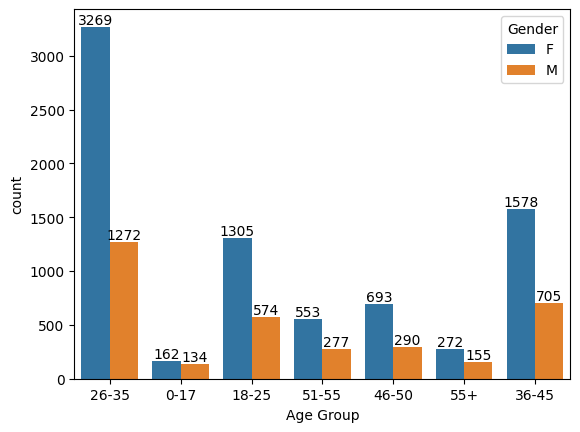

In [30]:
ax = sns.countplot(x = 'Age Group',data = df,hue ='Gender')
for x in ax.containers:
    ax.bar_label(x)

In [32]:
ax = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(20)
ax

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


In [ ]:
Above codes helps us getting state wise orders count.

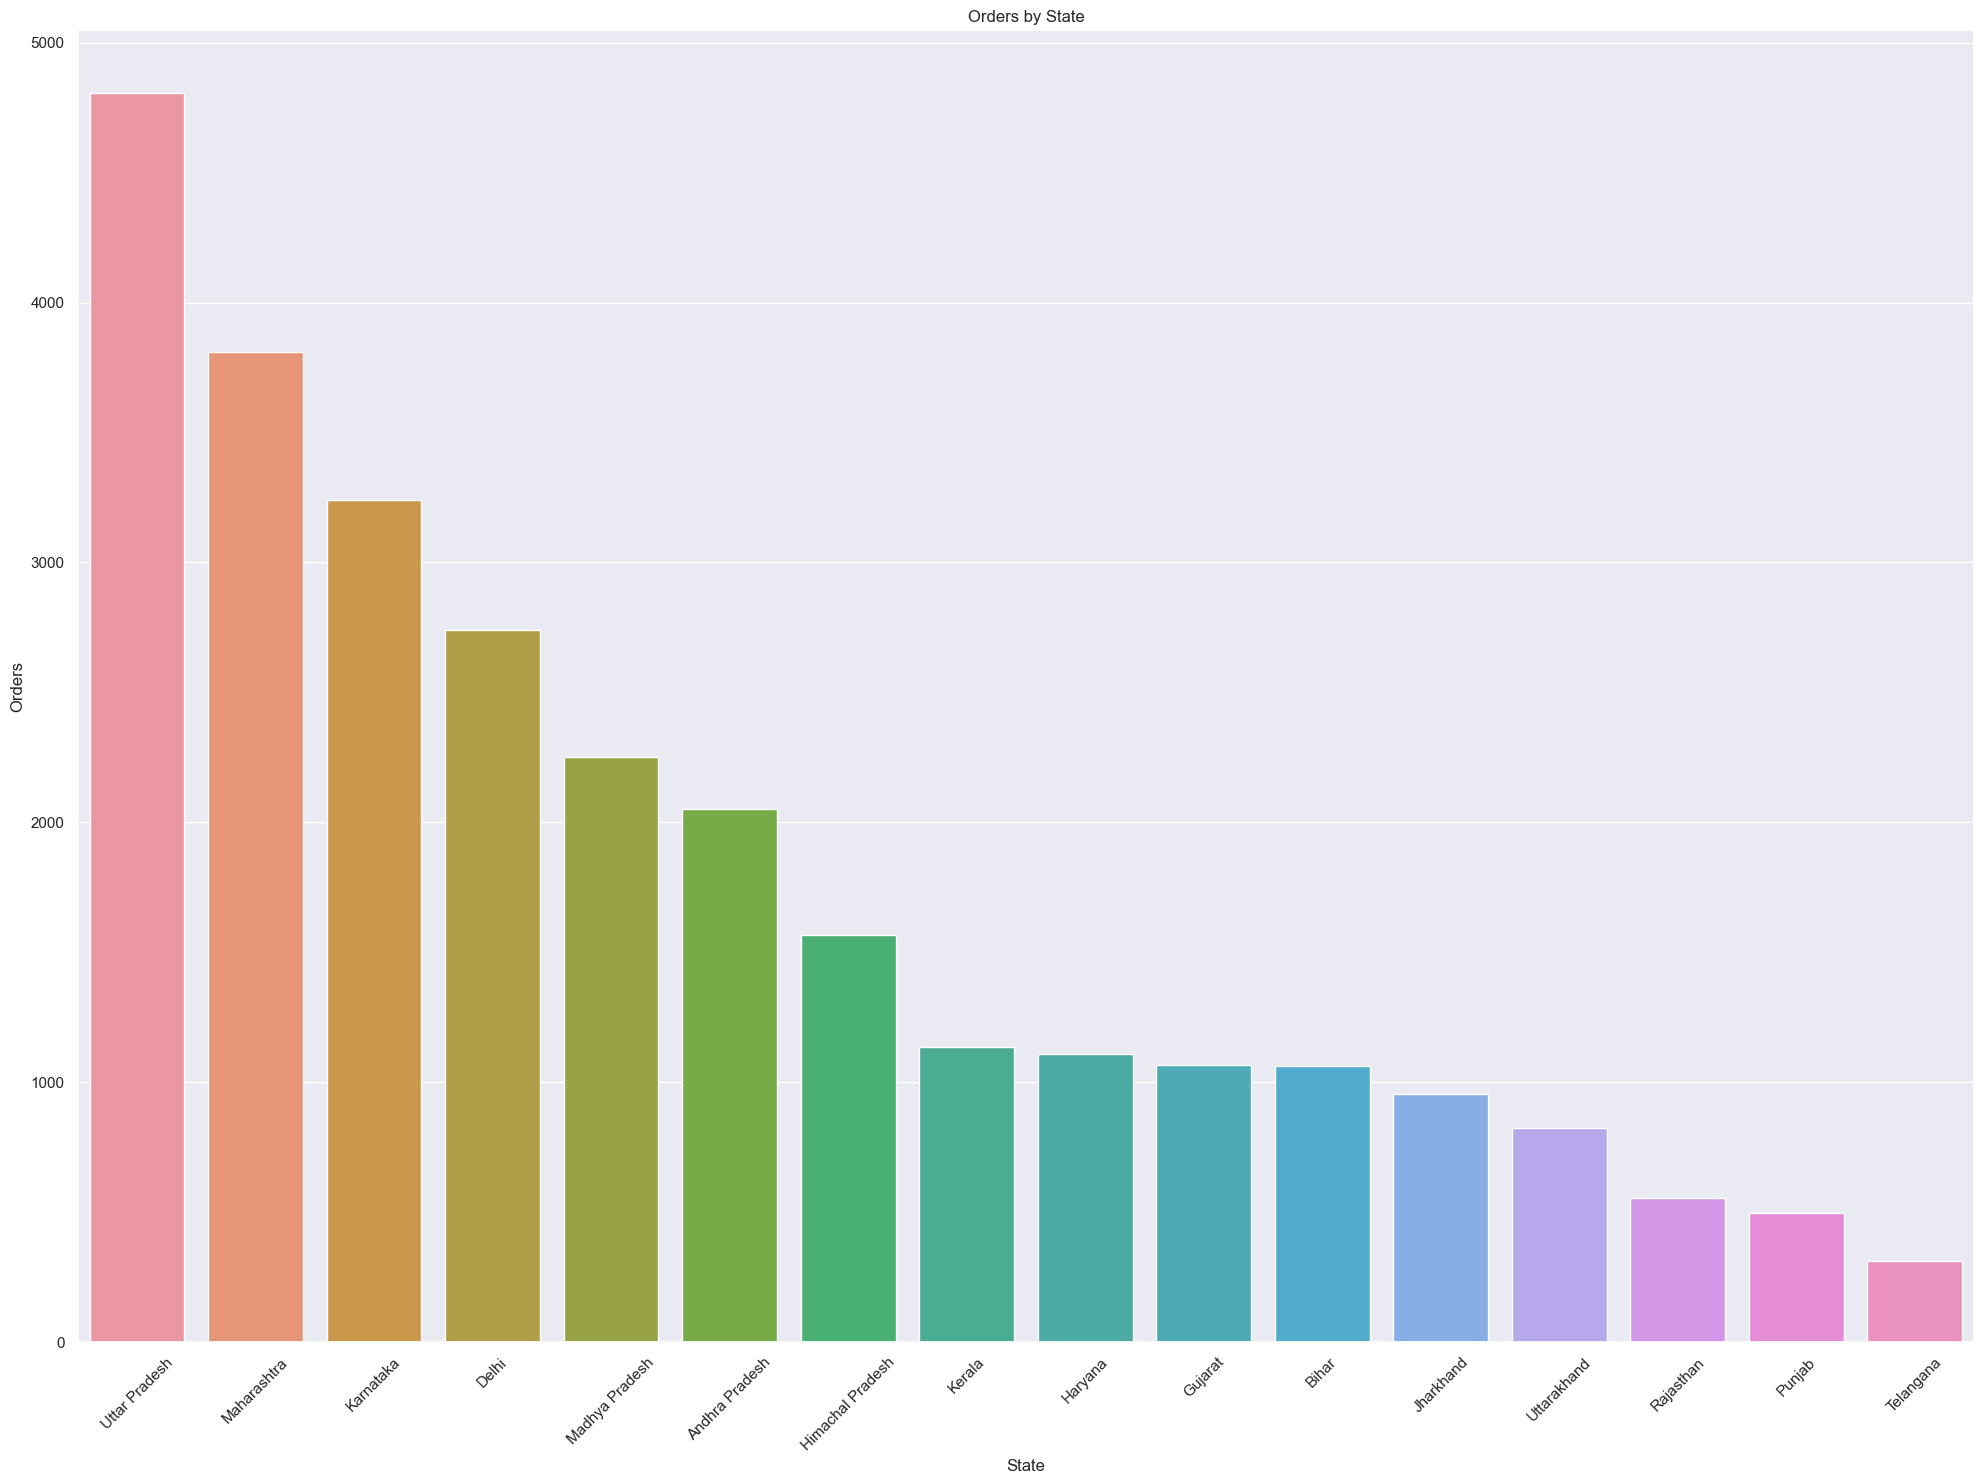

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'ax' with 'State' and 'Orders' columns

# Create the bar plot
sns.barplot(x='State', y='Orders', data=ax)
sns.set(rc = {'figure.figsize':(20,15)})
plt.gcf().set_facecolor('none')


# Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Label the axes and show the plot
plt.xlabel('State')
plt.ylabel('Orders')
plt.title('Orders by State')
plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()


In [34]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [40]:
sales_by_occupation = df.groupby(['Occupation'],as_index= False)['Amount'].sum().sort_values(by ='Amount', ascending = False)
sales_by_occupation

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


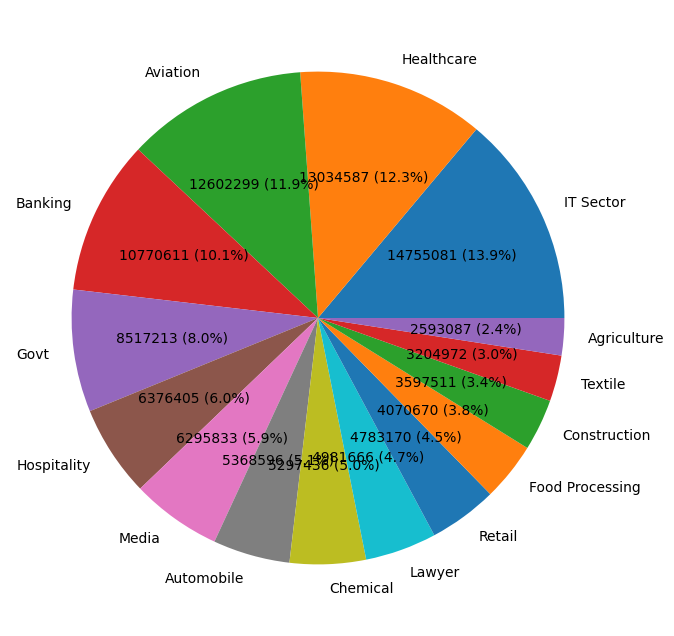

In [42]:

# Create a pie plot
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(sales_by_occupation['Amount'], labels=sales_by_occupation['Occupation'], autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sales_by_occupation['Amount']) / 100, p))

# Rotate tick labels on the y-axis
plt.tick_params(axis='x', rotation=45)

plt.show()


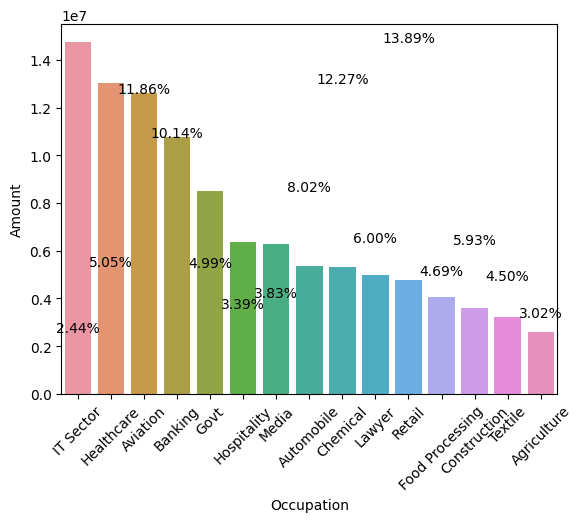

In [48]:
sns.barplot(x='Occupation', y='Amount', data=sales_by_occupation)
plt.xticks(rotation=45)

# Add percentage labels
for index, row in sales_by_occupation.iterrows():
    percentage = row['Amount'] / sales_by_occupation['Amount'].sum() * 100
    plt.text(index, row['Amount'], f'{percentage:.2f}%', ha='center')

plt.show()

In [49]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

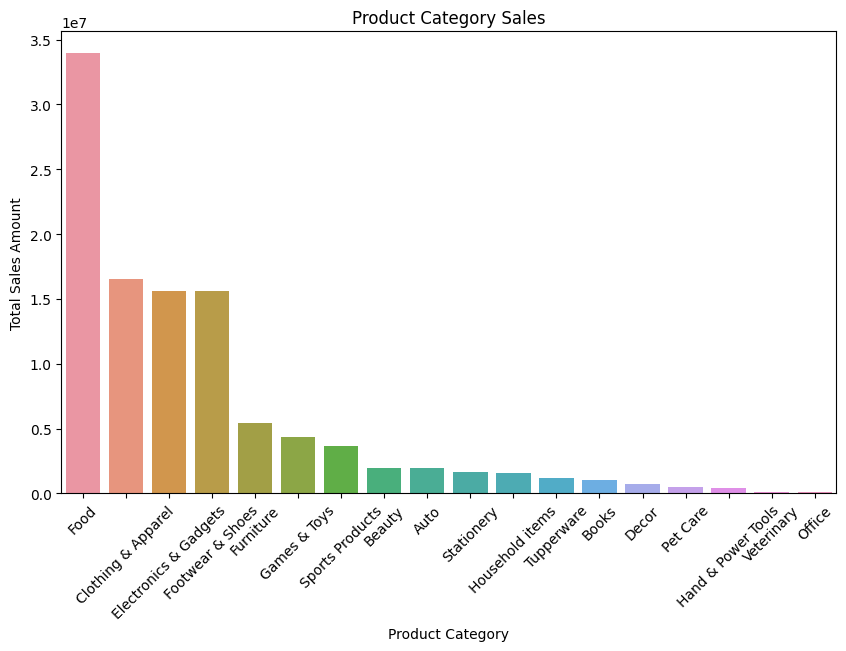

In [79]:

product_category_sales = df.groupby('Product_Category')['Amount'].sum().reset_index().sort_values(by = 'Amount',ascending = False)
product_category_sales

plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Amount', data=product_category_sales)
plt.title('Product Category Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


<Figure size 10000x1500 with 0 Axes>

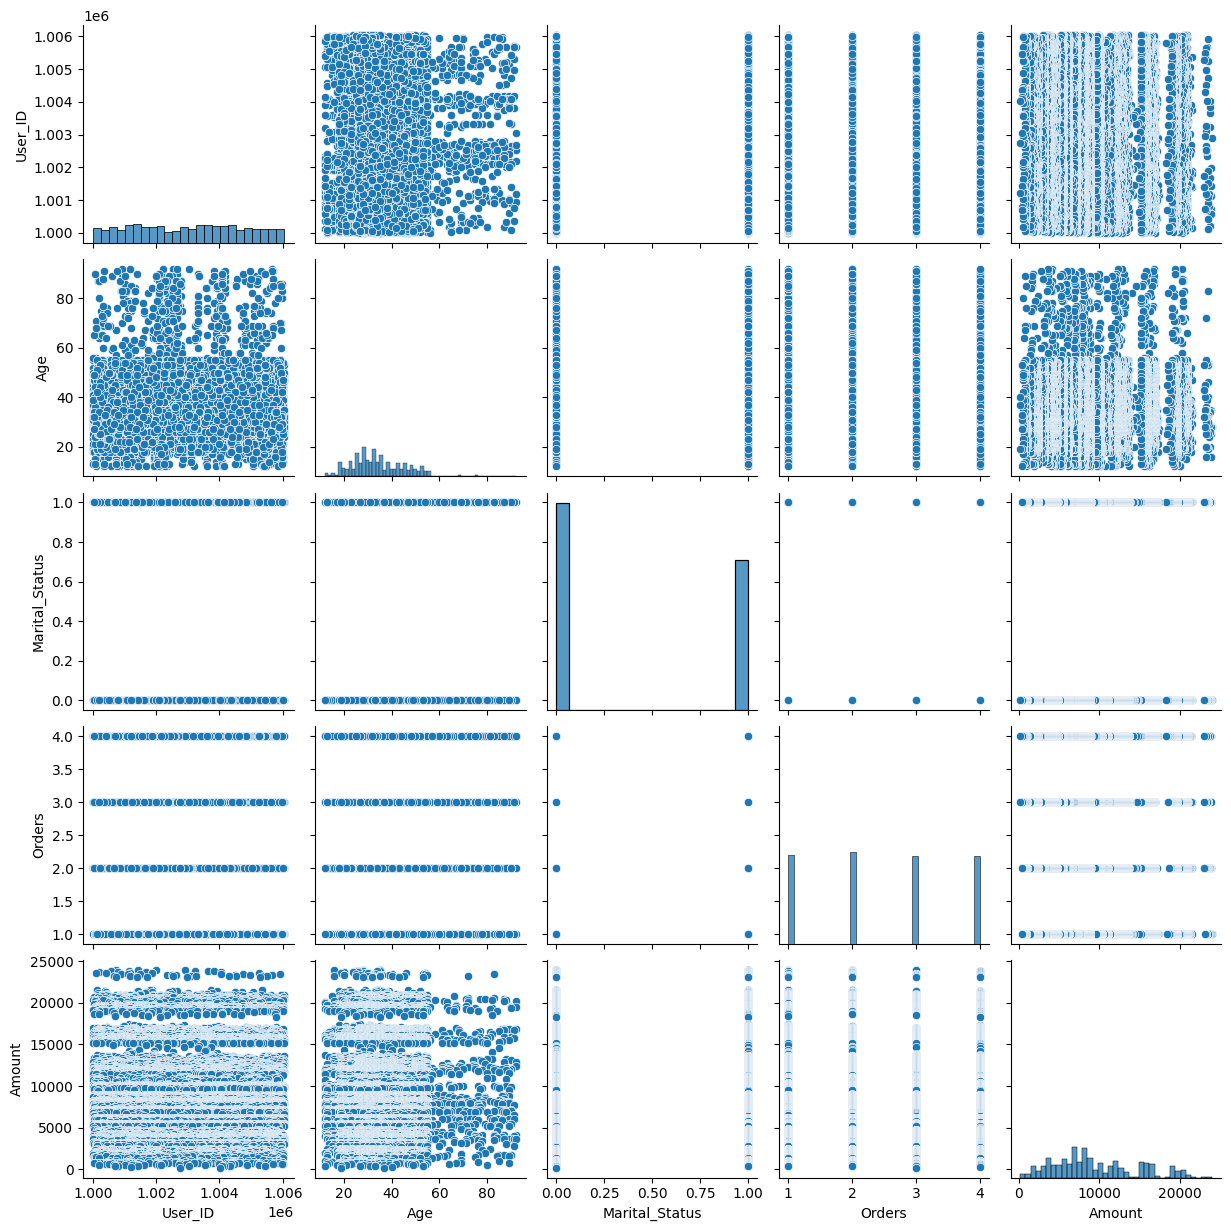

<Figure size 10000x1500 with 0 Axes>

In [67]:
sns.pairplot(data=df)
plt.xticks(rotation=45)
plt.figure(figsize=(100, 15))


the above pairlot shows us the correaltion of numeric data which each other.

In [1]:
cd

C:\Users\SHIVAM
